# **Identifying Method-Level Mutant Subsumption Relations in Z3**

### **Importing Libraries**

In [ ]:
try:
  import z3
except:
  !pip install z3-solver
  import z3

from z3 import *
from graphviz import Digraph

import math
import pandas
import random as rd
import matplotlib.pyplot as plt

     |████████████████████████████████| 30.5MB 146kB/s 


### **Declaring Z3 Utility Functions**

In [ ]:
def check(f):
  s = Solver()
  s.add(f)
  r = s.check()
# all your queries are in a decidable fragment
  if r == unknown:
    print("unexpected unknown result for ", f)
  return r

def is_sat(f):
  return check(f) == sat

def is_unsat(f):
  return check(f) == unsat

def kills(p, m):
  return p != m

#This function proves a theorem using the Z3 Python API.
def prove(theorem):
    s = Solver()
    s.add(Not(theorem))
    if s.check() == unsat:
      return 1 # The theorem was proved
    else:
      if s.check() == unknown:
        print("unexpected unknown result for ", theorem)
        return 2 # Z3 does not know how to prove the theorem
      else:
        return 0 # It is not a valid theorem

### **Identifying Equivalent Mutants**

In [ ]:
# keeping the non equivalent mutants
def keepNonEquivalentMutants(p, muts):
  return [m for m in muts if prove(p==m)!=1]

### **Identifying Redundant Mutants**

In [ ]:
# keeping the non redundant mutants
def redundantMutants(m1,m2):
  if prove(m1==m2) == 1:
    print(str(m1)+" is duplicate to "+str(m2))  
    return True
  else:
    return False

def keepNonRedundantMutants(muts):
  non_redundant = []
  for m1 in muts:
    if not any(redundantMutants(m1, m2) for m2 in non_redundant):
      non_redundant.append(m1)
  return non_redundant

### **Identifying Subsumption Relations**

In [ ]:
# condition 1
def is_non_empty(p, cond, m):
  return is_sat(And(cond, kills(p, m)))

# condition 2
def is_subset(p, cond, m1, m2):
  return is_unsat(And(cond, kills(p, m2), Not(kills(p, m1))))

# condition 3
def is_strict(p, cond, m1, m2):
  return is_sat(And(cond, kills(p, m1), Not(kills(p, m2))))

def subsumption(p,m1,m2,conds):
  t1 = is_non_empty(p, conds, m2)
  t2 = is_subset(p, conds, m1, m2)
  if t1 == 1 and t2 == 1:
    print(str(m2)+" subsumes "+str(m1))
    return (m2,m1)
  else:
    return None

def identifySubsumptions(p, muts, conds):
  result = []
  for i in range(len(muts)):
    for j in range(len(muts)):
      if i != j:
        s = subsumption(p,muts[i], muts[j], conds)
        if (s is not None):
          result.append(s)
  return result

#### **Creating a Subsumption Relation Graph**

In [ ]:
def createSubsumptionRelationGraph(subsumptions, mutations, mutationNames):
  graph = Digraph('G')
  for m in mutations:
      graph.node(mutationNames[str(m)])
  for s in subsumptions:
    x = mutationNames[str(s[0])]
    y = mutationNames[str(s[1])]
    graph.edge(x,y)
  return graph

**Declaring common functions**

In [ ]:
def xor(a,b):
    return Or(And(a,Not(b)),And(Not(a),b))

### **Using our approach to prove subsumption relations for 37 mutation targets**

**A.1 Arithmetic expressions with integers:**

In [ ]:
# 1) Declare variables and conditions
x = Int('x')
y = Int('y')
conditions = And(x>0,y>0)

A.1.1 lexp + rexp
x*y subsumes x - y
x subsumes x - y
y subsumes x - y
x*y subsumes x
x - y subsumes x
y subsumes x
x*y subsumes y
x - y subsumes y
x subsumes y


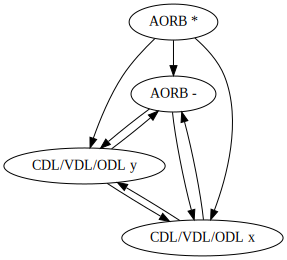

In [ ]:
msg = "A.1.1 lexp + rexp"
print(msg)
print('============================================')
# 2) Specify a program
program = x+y
# 3) Specify a list of mutants and mutation names
mutations = [x*y, x-y, x, y]
mutationNames =	{
  "x*y": "AORB *",
  "x - y": "AORB -",
  "x": "CDL/VDL/ODL y",
  "y": "CDL/VDL/ODL x",
}
# 4) Keep non equivalent mutants
mutations = keepNonEquivalentMutants(program, mutations)
# 5) Keep non redundant mutants
mutations = keepNonRedundantMutants(mutations)
# 6) Identify subsumption relations
subsumptions = identifySubsumptions(program, mutations, conditions)
print('============================================')
# 7) Draw the subsumption relation graph
createSubsumptionRelationGraph(subsumptions, mutations, mutationNames)

A.1.2 lexp - rexp
x + y subsumes x*y
x subsumes x*y
y subsumes x*y
x*y subsumes x + y
x subsumes x + y
y subsumes x + y
x*y subsumes x
x + y subsumes x
y subsumes x


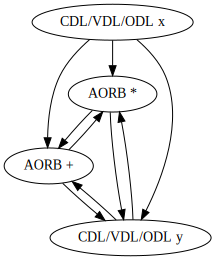

In [ ]:
msg = "A.1.2 lexp - rexp"
print(msg)
print('============================================')
# 2) Specify a program
program = x-y
# 3) Specify a list of mutants and mutation names
mutations = [x*y, x+y, x, y]
mutationNames = {
  "x*y": "AORB *",
  "x + y": "AORB +",
  "x": "CDL/VDL/ODL y",
  "y": "CDL/VDL/ODL x", 
}
# 4) Keep non equivalent mutants
mutations = keepNonEquivalentMutants(program, mutations)
# 5) Keep non redundant mutants
mutations = keepNonRedundantMutants(mutations)
# 6) Identify subsumption relations
subsumptions = identifySubsumptions(program, mutations, conditions)
print('============================================')
# 7) Draw the subsumption relation graph
createSubsumptionRelationGraph(subsumptions, mutations, mutationNames)

A.1.3 lexp * rexp
x + y subsumes x - y
x subsumes x - y
y subsumes x - y


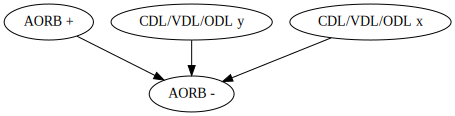

In [ ]:
msg = "A.1.3 lexp * rexp"
print(msg)
print('============================================')
# 2) Specify a program
program = x*y
# 3) Specify a list of mutants and mutation names
mutations = [x-y, x+y, x, y]
mutationNames = {
  "x - y": "AORB -",
  "x + y": "AORB +",
  "x": "CDL/VDL/ODL y",
  "y": "CDL/VDL/ODL x", 
}
# 4) Keep non equivalent mutants
mutations = keepNonEquivalentMutants(program, mutations)
# 5) Keep non redundant mutants
mutations = keepNonRedundantMutants(mutations)
# 6) Identify subsumption relations
subsumptions = identifySubsumptions(program, mutations, conditions)
print('============================================')
# 7) Draw the subsumption relation graph
createSubsumptionRelationGraph(subsumptions, mutations, mutationNames)

**A.2 Logic expressions with booleans:**

In [ ]:
# 1) Declare variables and conditions
x = Bool('x')
y = Bool('y')
conditions = True

A.2.1 lexp ^ rexp
x == y is duplicate to Not(Or(And(x, Not(y)), And(Not(x), y)))
Or(And(Not(x), Not(y)), And(Not(Not(x)), y)) is duplicate to Not(Or(And(x, Not(y)), And(Not(x), y)))
Or(And(x, Not(Not(y))), And(Not(x), Not(y))) is duplicate to Not(Or(And(x, Not(y)), And(Not(x), y)))
Or(x, y) subsumes True
Or(x, y) subsumes x
Or(x, y) subsumes y
True subsumes Not(Or(And(x, Not(y)), And(Not(x), y)))
False subsumes Not(Or(And(x, Not(y)), And(Not(x), y)))
Or(x, y) subsumes Not(Or(And(x, Not(y)), And(Not(x), y)))
x subsumes Not(Or(And(x, Not(y)), And(Not(x), y)))
y subsumes Not(Or(And(x, Not(y)), And(Not(x), y)))
And(x, y) subsumes Not(Or(And(x, Not(y)), And(Not(x), y)))
False subsumes And(x, y)
Or(x, y) subsumes And(x, y)
x subsumes And(x, y)
y subsumes And(x, y)


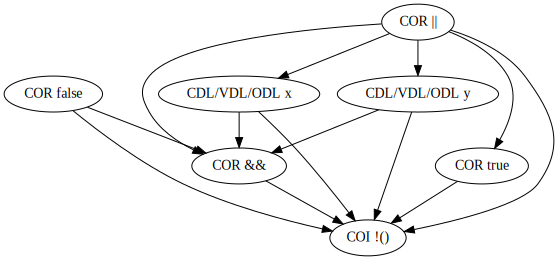

In [ ]:
msg = "A.2.1 lexp ^ rexp"
print(msg)
print('============================================')
# 2) Specify a program
program = xor(x,y)
# 3) Specify a list of mutants and mutation names
mutations = [True, False, Or(x,y), x, y, Not(program), x==y, 
             x!=y,And(x,y), xor(Not(x),y), xor(x,Not(y))]
mutationNames = {
    "True": "COR true",
    "False": "COR false",
    "Or(x, y)": "COR ||",
    "y": "CDL/VDL/ODL x", 
    "x": "CDL/VDL/ODL y",
    "Not(Or(And(x, Not(y)), And(Not(x), y)))": "COI !()",
    "x == y": "ROR ==",
    "x != y": "ROR !=",
    "And(x, y)": "COR &&",
    "Not(x)^y": "COI !x ^ y",
    "x^Not(y)": "COI x ^ !y"
}
# 4) Keep non equivalent mutants
mutations = keepNonEquivalentMutants(program, mutations)
# 5) Keep non redundant mutants
mutations = keepNonRedundantMutants(mutations)
# 6) Identify subsumption relations
subsumptions = identifySubsumptions(program, mutations, conditions)
print('============================================')
# 7) Draw the subsumption relation graph
createSubsumptionRelationGraph(subsumptions, mutations, mutationNames)

A.2.2 lexp && rexp
Or(And(x, Not(y)), And(Not(x), y)) is duplicate to x != y
Or(x, y) subsumes True
x subsumes True
y subsumes True
x == y subsumes True
x subsumes Or(x, y)
y subsumes Or(x, y)
True subsumes Not(And(x, y))
False subsumes Not(And(x, y))
Or(x, y) subsumes Not(And(x, y))
x subsumes Not(And(x, y))
y subsumes Not(And(x, y))
x == y subsumes Not(And(x, y))
x != y subsumes Not(And(x, y))
And(Not(x), y) subsumes Not(And(x, y))
And(x, Not(y)) subsumes Not(And(x, y))
False subsumes x != y
Or(x, y) subsumes x != y
x subsumes x != y
y subsumes x != y
And(Not(x), y) subsumes x != y
And(x, Not(y)) subsumes x != y
False subsumes And(Not(x), y)
y subsumes And(Not(x), y)
False subsumes And(x, Not(y))
x subsumes And(x, Not(y))


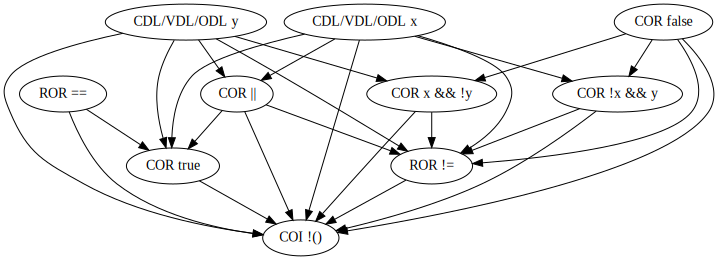

In [ ]:
msg = "A.2.2 lexp && rexp"
print(msg)
print('============================================')
# 2) Specify a program
program = And(x,y)
# 3) Specify a list of mutants and mutation names
mutations = [True, False, Or(x,y), x, y, Not(program), x==y, 
             x!=y,xor(x,y), And(Not(x),y), And(x, Not(y))]
mutationNames = {
    "True": "COR true",
    "False": "COR false",
    "Or(x, y)": "COR ||",
    "y": "CDL/VDL/ODL x", 
    "x": "CDL/VDL/ODL y",
    "Not(And(x, y))": "COI !()",
    "x == y": "ROR ==",
    "x != y": "ROR !=",
    "Or(And(x, Not(y)), And(Not(x), y))": "COR ^",
    "And(Not(x), y)": "COR !x && y",
    "And(x, Not(y))": "COR x && !y"
}
# 4) Keep non equivalent mutants
mutations = keepNonEquivalentMutants(program, mutations)
# 5) Keep non redundant mutants
mutations = keepNonRedundantMutants(mutations)
# 6) Identify subsumption relations
subsumptions = identifySubsumptions(program, mutations, conditions)
print('============================================')
# 7) Draw the subsumption relation graph
createSubsumptionRelationGraph(subsumptions, mutations, mutationNames)

A.2.3 lexp || rexp
Or(And(x, Not(y)), And(Not(x), y)) is duplicate to x != y
And(x, y) subsumes False
x subsumes False
y subsumes False
x != y subsumes False
x subsumes And(x, y)
y subsumes And(x, y)
True subsumes Not(Or(x, y))
False subsumes Not(Or(x, y))
And(x, y) subsumes Not(Or(x, y))
x subsumes Not(Or(x, y))
y subsumes Not(Or(x, y))
x == y subsumes Not(Or(x, y))
x != y subsumes Not(Or(x, y))
Or(Not(x), y) subsumes Not(Or(x, y))
Or(x, Not(y)) subsumes Not(Or(x, y))
True subsumes x == y
And(x, y) subsumes x == y
x subsumes x == y
y subsumes x == y
Or(Not(x), y) subsumes x == y
Or(x, Not(y)) subsumes x == y
True subsumes Or(Not(x), y)
y subsumes Or(Not(x), y)
True subsumes Or(x, Not(y))
x subsumes Or(x, Not(y))


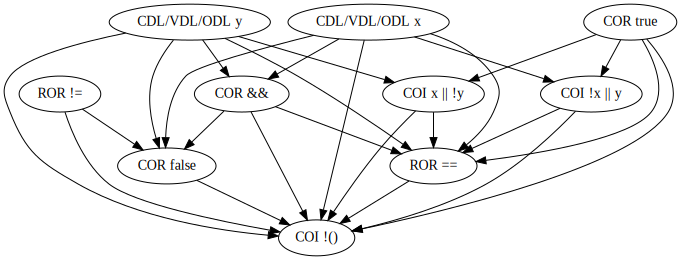

In [ ]:
msg = "A.2.3 lexp || rexp"
print(msg)
print('============================================')
# 2) Specify a program
program = Or(x,y)
# 3) Specify a list of mutants and mutation names
mutations = [True, False, And(x,y), x, y, Not(program), x==y, 
             x!=y,xor(x,y), Or(Not(x),y), Or(x, Not(y))]
mutationNames = {
    "True": "COR true",
    "False": "COR false",
    "And(x, y)": "COR &&",
    "y": "CDL/VDL/ODL x", 
    "x": "CDL/VDL/ODL y",
    "Not(Or(x, y))": "COI !()",
    "x == y": "ROR ==",
    "x != y": "ROR !=",
    "Or(And(x, Not(y)), And(Not(x), y))": "COR ^",
    "Or(Not(x), y)": "COI !x || y",
    "Or(x, Not(y))": "COI x || !y"
}
# 4) Keep non equivalent mutants
mutations = keepNonEquivalentMutants(program, mutations)
# 5) Keep non redundant mutants
mutations = keepNonRedundantMutants(mutations)
# 6) Identify subsumption relations
subsumptions = identifySubsumptions(program, mutations, conditions)
print('============================================')
# 7) Draw the subsumption relation graph
createSubsumptionRelationGraph(subsumptions, mutations, mutationNames)

A.2.4 (bool) lexp == rexp
x != y is duplicate to Not(x == y)
Not(x) == y is duplicate to Not(x == y)
x == Not(y) is duplicate to Not(x == y)
x subsumes Not(x == y)
y subsumes Not(x == y)


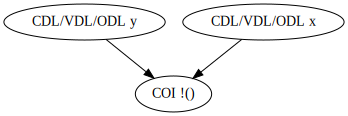

In [ ]:
msg = "A.2.4 (bool) lexp == rexp"
print(msg)
print('============================================')
# 2) Specify a program
program = x==y
# 3) Specify a list of mutants and mutation names
mutations = [Not(program), x!=y,Not(x)==y,x==Not(y),x,y]
mutationNames = {
    "Not(x == y)": "COI !()",
    "x!=y": "ROR !=",
    "Not(x) == y": "COI !x == y",
    "x == Not(y)": "COI x == !y",
    "y": "CDL/VDL/ODL x", 
    "x": "CDL/VDL/ODL y"
}
# 4) Keep non equivalent mutants
mutations = keepNonEquivalentMutants(program, mutations)
# 5) Keep non redundant mutants
mutations = keepNonRedundantMutants(mutations)
# 6) Identify subsumption relations
subsumptions = identifySubsumptions(program, mutations, conditions)
print('============================================')
# 7) Draw the subsumption relation graph
createSubsumptionRelationGraph(subsumptions, mutations, mutationNames)

A.2.5 (bool) lexp != rexp
Not(x != y) is duplicate to x == y
Not(x) != y is duplicate to x == y
x != Not(y) is duplicate to x == y
x subsumes x == y
y subsumes x == y


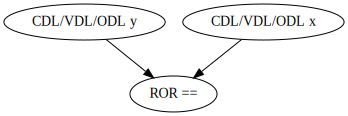

In [ ]:
msg = "A.2.5 (bool) lexp != rexp"
print(msg)
print('============================================')
# 2) Specify a program
program = x!=y
# 3) Specify a list of mutants and mutation names
mutations = [x==y,Not(program),Not(x)!=y,x!=Not(y),x,y]
mutationNames = {
    "x == y": "ROR ==",
    "Not(x != y)": "COI ()",
    "Not(x) != y": "COI !x != y",
    "x != Not(y)": "COI x != !y",
    "y": "CDL/VDL/ODL x", 
    "x": "CDL/VDL/ODL y"
}
# 4) Keep non equivalent mutants
mutations = keepNonEquivalentMutants(program, mutations)
# 5) Keep non redundant mutants
mutations = keepNonRedundantMutants(mutations)
# 6) Identify subsumption relations
subsumptions = identifySubsumptions(program, mutations, conditions)
print('============================================')
# 7) Draw the subsumption relation graph
createSubsumptionRelationGraph(subsumptions, mutations, mutationNames)

**A.3 Relational expressions with integers:**

In [ ]:
# 1) Declare variables and conditions
x = Int('x')
y = Int('y')
conditions = True

A.3.1 lexp == rexp
Not(x == y) is duplicate to x != y
x >= y subsumes True
x <= y subsumes True
False subsumes x > y
x >= y subsumes x > y
False subsumes x < y
x <= y subsumes x < y
True subsumes x != y
False subsumes x != y
x >= y subsumes x != y
x <= y subsumes x != y
x > y subsumes x != y
x < y subsumes x != y


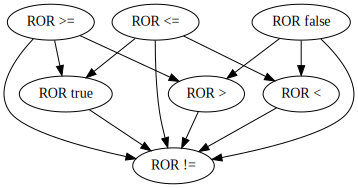

In [ ]:
msg = "A.3.1 lexp == rexp"
print(msg)
print('============================================')
# 2) Specify a program
program = x==y
# 3) Specify a list of mutants and mutation names
mutations = [True,False,x>=y,x<=y,x>y,x<y,x!=y,Not(program)]
mutationNames = {
    "True": "ROR true",
    "False": "ROR false",
    "x >= y": "ROR >=",
    "x <= y": "ROR <=",
    "x > y": "ROR >",
    "x < y": "ROR <",
    "x != y": "ROR !=",
    "Not(x == y)": "COI !()"
}
# 4) Keep non equivalent mutants
mutations = keepNonEquivalentMutants(program, mutations)
# 5) Keep non redundant mutants
mutations = keepNonRedundantMutants(mutations)
# 6) Identify subsumption relations
subsumptions = identifySubsumptions(program, mutations, conditions)
print('============================================')
# 7) Draw the subsumption relation graph
createSubsumptionRelationGraph(subsumptions, mutations, mutationNames)

A.3.2 lexp != rexp
Not(x != y) is duplicate to x == y
x > y subsumes False
x < y subsumes False
True subsumes x >= y
x > y subsumes x >= y
True subsumes x <= y
x < y subsumes x <= y
True subsumes x == y
False subsumes x == y
x >= y subsumes x == y
x <= y subsumes x == y
x > y subsumes x == y
x < y subsumes x == y


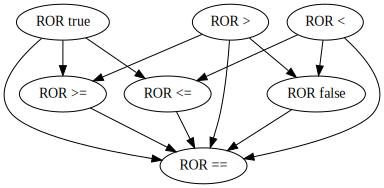

In [ ]:
msg = "A.3.2 lexp != rexp"
print(msg)
print('============================================')
# 2) Specify a program
program = x!=y
# 3) Specify a list of mutants and mutation names
mutations = [True,False,x>=y,x<=y,x>y,x<y,x==y,Not(program)]
mutationNames = {
    "True": "ROR true",
    "False": "ROR false",
    "x >= y": "ROR >=",
    "x <= y": "ROR <=",
    "x > y": "ROR >",
    "x < y": "ROR <",
    "x == y": "ROR ==",
    "Not(x != y)": "COI !()"
}
# 4) Keep non equivalent mutants
mutations = keepNonEquivalentMutants(program, mutations)
# 5) Keep non redundant mutants
mutations = keepNonRedundantMutants(mutations)
# 6) Identify subsumption relations
subsumptions = identifySubsumptions(program, mutations, conditions)
print('============================================')
# 7) Draw the subsumption relation graph
createSubsumptionRelationGraph(subsumptions, mutations, mutationNames)

A.3.3 lexp > rexp
Not(x > y) is duplicate to x <= y
x >= y subsumes True
x != y subsumes True
True subsumes x <= y
False subsumes x <= y
x >= y subsumes x <= y
x < y subsumes x <= y
x == y subsumes x <= y
x != y subsumes x <= y
False subsumes x < y
x != y subsumes x < y
False subsumes x == y
x >= y subsumes x == y


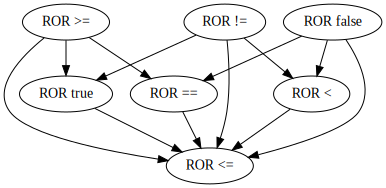

In [ ]:
msg = "A.3.3 lexp > rexp"
print(msg)
print('============================================')
# 2) Specify a program
program = x>y
# 3) Specify a list of mutants and mutation names
mutations = [True,False,x>=y,x<=y,x<y,x==y,x!=y,Not(program)]
mutationNames = {
    "True": "ROR true",
    "False": "ROR false",
    "x >= y": "ROR >=",
    "x <= y": "ROR <=",
    "x < y": "ROR <",
    "x == y": "ROR ==",
    "x != y": "ROR !=",
    "Not(x > y)": "COI !()"
}
# 4) Keep non equivalent mutants
mutations = keepNonEquivalentMutants(program, mutations)
# 5) Keep non redundant mutants
mutations = keepNonRedundantMutants(mutations)
# 6) Identify subsumption relations
subsumptions = identifySubsumptions(program, mutations, conditions)
print('============================================')
# 7) Draw the subsumption relation graph
createSubsumptionRelationGraph(subsumptions, mutations, mutationNames)

A.3.4 lexp >= rexp
Not(x >= y) is duplicate to x < y
x > y subsumes False
x == y subsumes False
True subsumes x <= y
x == y subsumes x <= y
True subsumes x < y
False subsumes x < y
x <= y subsumes x < y
x > y subsumes x < y
x == y subsumes x < y
x != y subsumes x < y
True subsumes x != y
x > y subsumes x != y


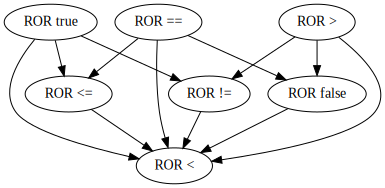

In [ ]:
msg = "A.3.4 lexp >= rexp"
print(msg)
print('============================================')
# 2) Specify a program
program = x>=y
# 3) Specify a list of mutants and mutation names
mutations = [True,False,x<=y,x<y,x>y,x==y,x!=y,Not(program)]
mutationNames = {
    "True": "ROR true",
    "False": "ROR false",
    "x > y": "ROR >",
    "x <= y": "ROR <=",
    "x < y": "ROR <",
    "x == y": "ROR ==",
    "x != y": "ROR !=",
    "Not(x >= y)": "COI !()"
}
# 4) Keep non equivalent mutants
mutations = keepNonEquivalentMutants(program, mutations)
# 5) Keep non redundant mutants
mutations = keepNonRedundantMutants(mutations)
# 6) Identify subsumption relations
subsumptions = identifySubsumptions(program, mutations, conditions)
print('============================================')
# 7) Draw the subsumption relation graph
createSubsumptionRelationGraph(subsumptions, mutations, mutationNames)

A.3.5 lexp < rexp
Not(x < y) is duplicate to x >= y
x <= y subsumes True
x != y subsumes True
True subsumes x >= y
False subsumes x >= y
x <= y subsumes x >= y
x > y subsumes x >= y
x == y subsumes x >= y
x != y subsumes x >= y
False subsumes x > y
x != y subsumes x > y
False subsumes x == y
x <= y subsumes x == y


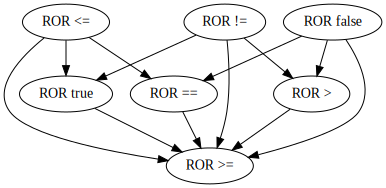

In [ ]:
msg = "A.3.5 lexp < rexp"
print(msg)
print('============================================')
# 2) Specify a program
program = x<y
# 3) Specify a list of mutants and mutation names
mutations = [True,False,x<=y,x>=y,x>y,x==y,x!=y,Not(program)]
mutationNames = {
    "True": "ROR true",
    "False": "ROR false",
    "x > y": "ROR >",
    "x <= y": "ROR <=",
    "x >= y": "ROR >=",
    "x == y": "ROR ==",
    "x != y": "ROR !=",
    "Not(x < y)": "COI !()"
}
# 4) Keep non equivalent mutants
mutations = keepNonEquivalentMutants(program, mutations)
# 5) Keep non redundant mutants
mutations = keepNonRedundantMutants(mutations)
# 6) Identify subsumption relations
subsumptions = identifySubsumptions(program, mutations, conditions)
print('============================================')
# 7) Draw the subsumption relation graph
createSubsumptionRelationGraph(subsumptions, mutations, mutationNames)

A.3.6 lexp <= rexp
Not(x <= y) is duplicate to x > y
x < y subsumes False
x == y subsumes False
True subsumes x >= y
x == y subsumes x >= y
True subsumes x > y
False subsumes x > y
x >= y subsumes x > y
x < y subsumes x > y
x == y subsumes x > y
x != y subsumes x > y
True subsumes x != y
x < y subsumes x != y


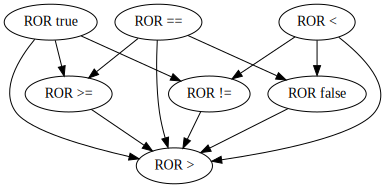

In [ ]:
msg = "A.3.6 lexp <= rexp"
print(msg)
print('============================================')
# 2) Specify a program
program = x<=y
# 3) Specify a list of mutants and mutation names
mutations = [True,False,x>=y,x<y,x>y,x==y,x!=y,Not(program)]
mutationNames = {
    "True": "ROR true",
    "False": "ROR false",
    "x < y": "ROR <",
    "x > y": "ROR >",
    "x >= y": "ROR >=",
    "x == y": "ROR ==",
    "x != y": "ROR !=",
    "Not(x < y)": "COI !()"
}
# 4) Keep non equivalent mutants
mutations = keepNonEquivalentMutants(program, mutations)
# 5) Keep non redundant mutants
mutations = keepNonRedundantMutants(mutations)
# 6) Identify subsumption relations
subsumptions = identifySubsumptions(program, mutations, conditions)
print('============================================')
# 7) Draw the subsumption relation graph
createSubsumptionRelationGraph(subsumptions, mutations, mutationNames)

A.3.7 (obj) lexp != rexp
Not(x != y) is duplicate to x == y
x > y subsumes False
x < y subsumes False
True subsumes x == y
False subsumes x == y
x > y subsumes x == y
x < y subsumes x == y
x <= y subsumes x == y
x >= y subsumes x == y
True subsumes x <= y
x < y subsumes x <= y
True subsumes x >= y
x > y subsumes x >= y


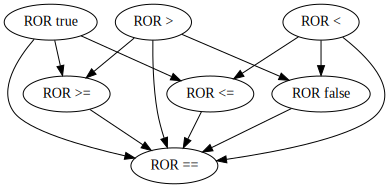

In [ ]:
msg = "A.3.7 (obj) lexp != rexp"
print(msg)
print('============================================')
# 2) Specify a program
program = x!=y
# 3) Specify a list of mutants and mutation names
mutations = [True,False,x>y,x<y,x==y,x<=y,x>=y,Not(program)]
mutationNames = {
    "True": "ROR true",
    "False": "ROR false",
    "x < y": "ROR <",
    "x > y": "ROR >",
    "x >= y": "ROR >=",
    "x <= y": "ROR <=",
    "x == y": "ROR ==",
    "Not(x x!= y)": "COI !()"
}
# 4) Keep non equivalent mutants
mutations = keepNonEquivalentMutants(program, mutations)
# 5) Keep non redundant mutants
mutations = keepNonRedundantMutants(mutations)
# 6) Identify subsumption relations
subsumptions = identifySubsumptions(program, mutations, conditions)
print('============================================')
# 7) Draw the subsumption relation graph
createSubsumptionRelationGraph(subsumptions, mutations, mutationNames)

**A.4 Logic expressions with bits:**

In [ ]:
# 1) Declare variables and conditions
x, y = BitVecs('x y', 32)
conditions = True

A.4.1 lexp & rexp'
x subsumes x | y
y subsumes x | y
x subsumes x ^ y
y subsumes x ^ y
x | y subsumes x ^ y
x << y subsumes x ^ y
x >> y subsumes x ^ y


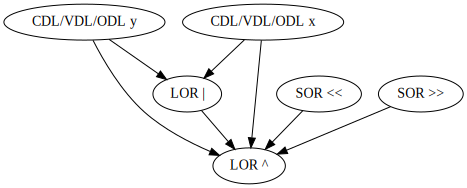

In [ ]:
msg = "A.4.1 lexp & rexp'"
print(msg)
print('============================================')
# 2) Specify a program
program = x & y
# 3) Specify a list of mutants and mutation names
mutations = [x, y, x|y, x^y, x<<y, x>>y]
mutationNames = {
    "y": "CDL/VDL/ODL x", 
    "x": "CDL/VDL/ODL y",
    "x | y": "LOR |",
    "x ^ y": "LOR ^",
    "x << y": "SOR <<",
    "x >> y": "SOR >>"
}
# 4) Keep non equivalent mutants
mutations = keepNonEquivalentMutants(program, mutations)
# 5) Keep non redundant mutants
mutations = keepNonRedundantMutants(mutations)
# 6) Identify subsumption relations
subsumptions = identifySubsumptions(program, mutations, conditions)
print('============================================')
# 7) Draw the subsumption relation graph
createSubsumptionRelationGraph(subsumptions, mutations, mutationNames)

A.4.2 lexp | rexp'
x subsumes x & y
y subsumes x & y
x subsumes x << y
x ^ y subsumes x << y
x >> y subsumes x << y


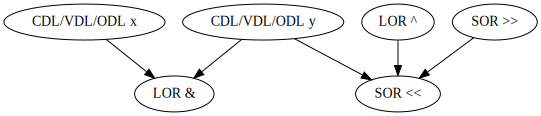

In [ ]:
msg = "A.4.2 lexp | rexp'"
print(msg)
print('============================================')
# 2) Specify a program
program = x | y
# 3) Specify a list of mutants and mutation names
mutations = [x, y, x&y, x^y, x<<y, x>>y]
mutationNames = {
    "y": "CDL/VDL/ODL x", 
    "x": "CDL/VDL/ODL y",
    "x & y": "LOR &",
    "x ^ y": "LOR ^",
    "x << y": "SOR <<",
    "x >> y": "SOR >>"
}
# 4) Keep non equivalent mutants
mutations = keepNonEquivalentMutants(program, mutations)
# 5) Keep non redundant mutants
mutations = keepNonRedundantMutants(mutations)
# 6) Identify subsumption relations
subsumptions = identifySubsumptions(program, mutations, conditions)
print('============================================')
# 7) Draw the subsumption relation graph
createSubsumptionRelationGraph(subsumptions, mutations, mutationNames)

A.4.3 lexp ^ rexp'
x | y subsumes x
x | y subsumes y
x subsumes x & y
y subsumes x & y
x | y subsumes x & y


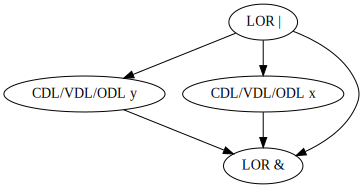

In [ ]:
msg = "A.4.3 lexp ^ rexp'"
print(msg)
print('============================================')
# 2) Specify a program
program = x ^ y
# 3) Specify a list of mutants and mutation names
mutations = [x, y, x&y, x|y]
mutationNames = {
    "y": "CDL/VDL/ODL x", 
    "x": "CDL/VDL/ODL y",
    "x & y": "LOR &",
    "x | y": "LOR |"
}
# 4) Keep non equivalent mutants
mutations = keepNonEquivalentMutants(program, mutations)
# 5) Keep non redundant mutants
mutations = keepNonRedundantMutants(mutations)
# 6) Identify subsumption relations
subsumptions = identifySubsumptions(program, mutations, conditions)
print('============================================')
# 7) Draw the subsumption relation graph
createSubsumptionRelationGraph(subsumptions, mutations, mutationNames)

A.4.4 lexp >> rexp'


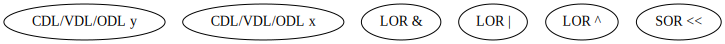

In [ ]:
msg = "A.4.4 lexp >> rexp'"
print(msg)
print('============================================')
# 2) Specify a program
program = x >> y
# 3) Specify a list of mutants and mutation names
mutations = [x, y, x&y, x|y, x^y, x<<y]
mutationNames = {
    "y": "CDL/VDL/ODL x", 
    "x": "CDL/VDL/ODL y",
    "x & y": "LOR &",
    "x ^ y": "LOR ^",
    "x | y": "LOR |",
    "x << y": "SOR <<"
}
# 4) Keep non equivalent mutants
mutations = keepNonEquivalentMutants(program, mutations)
# 5) Keep non redundant mutants
mutations = keepNonRedundantMutants(mutations)
# 6) Identify subsumption relations
subsumptions = identifySubsumptions(program, mutations, conditions)
print('============================================')
# 7) Draw the subsumption relation graph
createSubsumptionRelationGraph(subsumptions, mutations, mutationNames)

A.4.5 lexp << rexp'
x >> y subsumes x
x subsumes y
x & y subsumes y
x | y subsumes y
x ^ y subsumes y
x >> y subsumes y
x subsumes x | y
x ^ y subsumes x | y
x >> y subsumes x | y


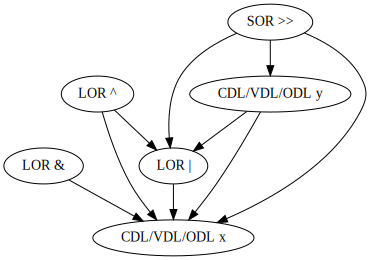

In [ ]:
msg = "A.4.5 lexp << rexp'"
print(msg)
print('============================================')
# 2) Specify a program
program = x << y
# 3) Specify a list of mutants and mutation names
mutations = [x, y, x&y, x|y, x^y, x>>y]
mutationNames = {
    "y": "CDL/VDL/ODL x", 
    "x": "CDL/VDL/ODL y",
    "x & y": "LOR &",
    "x ^ y": "LOR ^",
    "x | y": "LOR |",
    "x >> y": "SOR >>"
}
# 4) Keep non equivalent mutants
mutations = keepNonEquivalentMutants(program, mutations)
# 5) Keep non redundant mutants
mutations = keepNonRedundantMutants(mutations)
# 6) Identify subsumption relations
subsumptions = identifySubsumptions(program, mutations, conditions)
print('============================================')
# 7) Draw the subsumption relation graph
createSubsumptionRelationGraph(subsumptions, mutations, mutationNames)

**A.5 Unary expressions with bits:**

In [ ]:
# 1) Declare variables and conditions
x, y = BitVecs('x y', 32)
conditions = True

A.5.1 exp
-x subsumes ~x
x + 1 subsumes ~x
x - 1 subsumes ~x
-x subsumes x + 1
~x subsumes x + 1
x - 1 subsumes x + 1
-x subsumes x - 1
~x subsumes x - 1
x + 1 subsumes x - 1


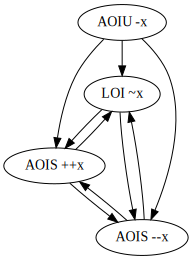

In [ ]:
msg = "A.5.1 exp"
print(msg)
print('============================================')
# 2) Specify a program
program = x
# 3) Specify a list of mutants and mutation names
mutations = [-x,~x,x+1,x-1,x]
# AOIS exp++ e AOIS exp-- are equivalents to the program
mutationNames = {
    "-x": "AOIU -x",
    "~x": "LOI ~x",
    "x + 1": "AOIS ++x",
    "x - 1": "AOIS --x",
    "x": "AOIS x++/x--"
}
# 4) Keep non equivalent mutants
mutations = keepNonEquivalentMutants(program, mutations)
# 5) Keep non redundant mutants
mutations = keepNonRedundantMutants(mutations)
# 6) Identify subsumption relations
subsumptions = identifySubsumptions(program, mutations, conditions)
print('============================================')
# 7) Draw the subsumption relation graph
createSubsumptionRelationGraph(subsumptions, mutations, mutationNames)

A.5.2 +exp


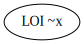

In [ ]:
msg = "A.5.2 +exp"
print(msg)
print('============================================')
# 2) Specify a program
program = +x
# 3) Specify a list of mutants and mutation names
mutations = [x, ~program]
mutationNames = {
    "x": "AODU/ODL x",
    "~x": "LOI ~x"
}
# 4) Keep non equivalent mutants
mutations = keepNonEquivalentMutants(program, mutations)
# 5) Keep non redundant mutants
mutations = keepNonRedundantMutants(mutations)
# 6) Identify subsumption relations
subsumptions = identifySubsumptions(program, mutations, conditions)
print('============================================')
# 7) Draw the subsumption relation graph
createSubsumptionRelationGraph(subsumptions, mutations, mutationNames)

A.5.3 -exp
x subsumes ~(-x)


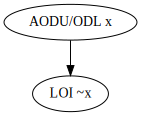

In [ ]:
msg = "A.5.3 -exp"
print(msg)
print('============================================')
# 2) Specify a program
program = -x
# 3) Specify a list of mutants and mutation names
mutations = [x,~program]
mutationNames = {
    "x": "AODU/ODL x",
    "~(-x)": "LOI ~x"
}
# 4) Keep non equivalent mutants
mutations = keepNonEquivalentMutants(program, mutations)
# 5) Keep non redundant mutants
mutations = keepNonRedundantMutants(mutations)
# 6) Identify subsumption relations
subsumptions = identifySubsumptions(program, mutations, conditions)
print('============================================')
# 7) Draw the subsumption relation graph
createSubsumptionRelationGraph(subsumptions, mutations, mutationNames)

A.5.4 ++exp
[x, ~(x + 1)]
[x, ~(x + 1)]
[]


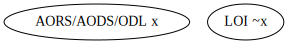

In [ ]:
def subsumption(p,m1,m2,conds):
  t1 = is_non_empty(p, conds, m2)
  t2 = is_subset(p, conds, m1, m2)
  t3 = is_strict(p, conds, m1, m2)
  #if t1 == 1 and t2 == 1:
  if t1 == 1 and t2 == 1 and t3 == 1:
    print(str(m2)+" subsumes "+str(m1))
    return (m2,m1)
  else:
    return None

msg = "A.5.4 ++exp"
print(msg)
print('============================================')
# 2) Specify a program
program = x+1
# 3) Specify a list of mutants and mutation names
mutations = [x,~program]
mutationNames = {
    "x": "AORS/AODS/ODL x",
    "~(x + 1)": "LOI ~x"
}
# 4) Keep non equivalent mutants
mutations = keepNonEquivalentMutants(program, mutations)
print(str((mutations)))
# 5) Keep non redundant mutants
mutations = keepNonRedundantMutants(mutations)
print(str((mutations)))
# 6) Identify subsumption relations
subsumptions = identifySubsumptions(program, mutations, conditions)
print(str(subsumptions))
print('============================================')
# 7) Draw the subsumption relation graph
createSubsumptionRelationGraph(subsumptions, mutations, mutationNames)

A.5.5 exp++


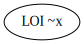

In [ ]:
msg = "A.5.5 exp++"
print(msg)
print('============================================')
# 2) Specify a program
program = x
# 3) Specify a list of mutants and mutation names
mutations = [x,~program]
# AORS, AODS e ODL são mutantes equivalentes ao programa
mutationNames = {
    "x": "AORS/AODS/ODL x",
    "~x": "LOI ~x"
}
# 4) Keep non equivalent mutants
mutations = keepNonEquivalentMutants(program, mutations)
# 5) Keep non redundant mutants
mutations = keepNonRedundantMutants(mutations)
# 6) Identify subsumption relations
subsumptions = identifySubsumptions(program, mutations, conditions)
print('============================================')
# 7) Draw the subsumption relation graph
createSubsumptionRelationGraph(subsumptions, mutations, mutationNames)

A.5.6 --exp


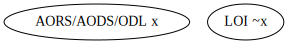

In [ ]:
msg = "A.5.6 --exp"
print(msg)
print('============================================')
# 2) Specify a program
program = x-1
# 3) Specify a list of mutants and mutation names
mutations = [x,~program]
# AORS, AODS e ODL são mutantes equivalentes ao programa
mutationNames = {
    "x": "AORS/AODS/ODL x",
    "~(x - 1)": "LOI ~x"
}
# 4) Keep non equivalent mutants
mutations = keepNonEquivalentMutants(program, mutations)
# 5) Keep non redundant mutants
mutations = keepNonRedundantMutants(mutations)
# 6) Identify subsumption relations
subsumptions = identifySubsumptions(program, mutations, conditions)
print('============================================')
# 7) Draw the subsumption relation graph
createSubsumptionRelationGraph(subsumptions, mutations, mutationNames)

A.5.7 exp--


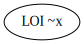

In [ ]:
msg = "A.5.7 exp--"
print(msg)
print('============================================')
# 2) Specify a program
program = x
# 3) Specify a list of mutants and mutation names
mutations = [x,~program]
# AORS, AODS e ODL são mutantes equivalentes ao programa
mutationNames = {
    "x": "AORS/AODS/ODL x",
    "~x": "LOI ~x"
}
# 4) Keep non equivalent mutants
mutations = keepNonEquivalentMutants(program, mutations)
# 5) Keep non redundant mutants
mutations = keepNonRedundantMutants(mutations)
# 6) Identify subsumption relations
subsumptions = identifySubsumptions(program, mutations, conditions)
print('============================================')
# 7) Draw the subsumption relation graph
createSubsumptionRelationGraph(subsumptions, mutations, mutationNames)

A.5.9 ~exp


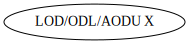

In [ ]:
msg = "A.5.9 ~exp"
print(msg)
print('============================================')
# 2) Specify a program
program = ~x
# 3) Specify a list of mutants and mutation names
mutations = [x]
mutationNames = {
    "x": "LOD/ODL/AODU X",
}
# 4) Keep non equivalent mutants
mutations = keepNonEquivalentMutants(program, mutations)
# 5) Keep non redundant mutants
mutations = keepNonRedundantMutants(mutations)
# 6) Identify subsumption relations
subsumptions = identifySubsumptions(program, mutations, conditions)
print('============================================')
# 7) Draw the subsumption relation graph
createSubsumptionRelationGraph(subsumptions, mutations, mutationNames)

Unary expression with boolean:

A.5.8 !exp


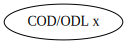

In [ ]:
x, y = Bools('x y')
msg = "A.5.8 !exp"
print(msg)
print('============================================')
# 2) Specify a program
program = Not(x)
# 3) Specify a list of mutants and mutation names
mutations = [x]
mutationNames = {
    "x": "COD/ODL x",
}
# 4) Keep non equivalent mutants
mutations = keepNonEquivalentMutants(program, mutations)
# 5) Keep non redundant mutants
mutations = keepNonRedundantMutants(mutations)
# 6) Identify subsumption relations
subsumptions = identifySubsumptions(program, mutations, conditions)
print('============================================')
# 7) Draw the subsumption relation graph
createSubsumptionRelationGraph(subsumptions, mutations, mutationNames)

**A.6 Assigment operator expressions with integers:**

In [ ]:
# 1) Declare variables and conditions
x = Int('x')
y = Int('y')
conditions = And(x>0,y>0)

A.6.1 lexp += rexp
x*y subsumes y
x*y subsumes x - y
x*y subsumes x


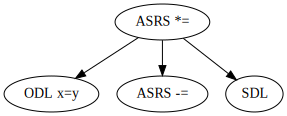

In [ ]:
msg = "A.6.1 lexp += rexp"
print(msg)
print('============================================')
# 2) Specify a program
program = x+y
# 3) Specify a list of mutants and mutation names
SDL = x
mutations = [y, x-y, x*y, SDL]
mutationNames = {
    "y": "ODL x=y",
    "x - y": "ASRS -=",
    "x*y": "ASRS *=",
    "x": "SDL"
}
# 4) Keep non equivalent mutants
mutations = keepNonEquivalentMutants(program, mutations)
# 5) Keep non redundant mutants
mutations = keepNonRedundantMutants(mutations)
# 6) Identify subsumption relations
subsumptions = identifySubsumptions(program, mutations, conditions)
print('============================================')
# 7) Draw the subsumption relation graph
createSubsumptionRelationGraph(subsumptions, mutations, mutationNames)

A.6.2 lexp -= rexp
y subsumes x + y
y subsumes x*y
y subsumes x


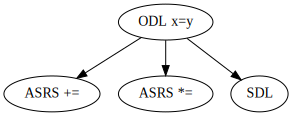

In [ ]:
msg = "A.6.2 lexp -= rexp"
print(msg)
print('============================================')
# 2) Specify a program
program = x-y
# 3) Specify a list of mutants  and mutation names
SDL = x
mutations = [y, x+y, x*y, SDL]
mutationNames = {
    "y": "ODL x=y",
    "x + y": "ASRS +=",
    "x*y": "ASRS *=",
    "x": "SDL"
}
# 4) Keep non equivalent mutants
mutations = keepNonEquivalentMutants(program, mutations)
# 5) Keep non redundant mutants
mutations = keepNonRedundantMutants(mutations)
# 6) Identify subsumption relations
subsumptions = identifySubsumptions(program, mutations, conditions)
print('============================================')
# 7) Draw the subsumption relation graph
createSubsumptionRelationGraph(subsumptions, mutations, mutationNames)

A.6.3 lexp *= rexp
y subsumes x - y
x + y subsumes x - y
x subsumes x - y


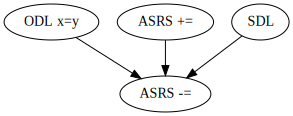

In [ ]:
msg = "A.6.3 lexp *= rexp"
print(msg)
print('============================================')
# 2) Specify a program
program = x*y
# 3) Specify a list of mutants and mutation names
SDL = x
mutations = [y, x+y, x-y, SDL]
mutationNames = {
    "y": "ODL x=y",
    "x + y": "ASRS +=",
    "x - y": "ASRS -=",
    "x": "SDL"
}
# 4) Keep non equivalent mutants
mutations = keepNonEquivalentMutants(program, mutations)
# 5) Keep non redundant mutants
mutations = keepNonRedundantMutants(mutations)
# 6) Identify subsumption relations
subsumptions = identifySubsumptions(program, mutations, conditions)
print('============================================')
# 7) Draw the subsumption relation graph
createSubsumptionRelationGraph(subsumptions, mutations, mutationNames)

**A.7 Shift operator expressions with bits:**

In [ ]:
# 1) Declare variables and conditions
x, y = BitVecs('x y', 32)
conditions = True

A.7.1 lexp <<= rexp
x subsumes y
x >> y subsumes y
x >> y subsumes x


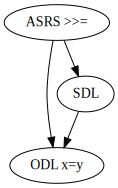

In [ ]:
msg = "A.7.1 lexp <<= rexp"
print(msg)
print('============================================')
# 2) Specify a program
program = x<<y
# 3) Specify a list of mutants and mutation names
SDL = x
mutations = [y,SDL,x>>y]
mutationNames = {
    "y": "ODL x=y",
    "x": "SDL",
    "x >> y": "ASRS >>="
}
# 4) Keep non equivalent mutants
mutations = keepNonEquivalentMutants(program, mutations)
# 5) Keep non redundant mutants
mutations = keepNonRedundantMutants(mutations)
# 6) Identify subsumption relations
subsumptions = identifySubsumptions(program, mutations, conditions)
print('============================================')
# 7) Draw the subsumption relation graph
createSubsumptionRelationGraph(subsumptions, mutations, mutationNames)

A.7.2 lexp >>= rexp


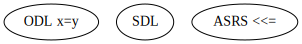

In [ ]:
msg = "A.7.2 lexp >>= rexp"
print(msg)
print('============================================')
# 2) Specify a program
program = x>>y
# 3) Specify a list of mutants and mutation names
SDL = x
mutations = [y,SDL,x<<y]
mutationNames = {
    "y": "ODL x=y",
    "x": "SDL",
    "x << y": "ASRS <<="
}
# 4) Keep non equivalent mutants
mutations = keepNonEquivalentMutants(program, mutations)
# 5) Keep non redundant mutants
mutations = keepNonRedundantMutants(mutations)
# 6) Identify subsumption relations
subsumptions = identifySubsumptions(program, mutations, conditions)
print('============================================')
# 7) Draw the subsumption relation graph
createSubsumptionRelationGraph(subsumptions, mutations, mutationNames)

**A.8 Assigment operator expressions with bits:**

In [ ]:
# 1) Declare variables and conditions
x, y = BitVecs('x y', 32)
conditions = True

A.8.1 lexp &= rexp
y subsumes x | y
x subsumes x | y
y subsumes x ^ y
x subsumes x ^ y
x | y subsumes x ^ y


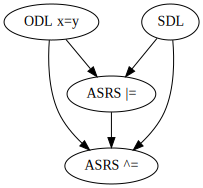

In [ ]:
msg = "A.8.1 lexp &= rexp"
print(msg)
print('============================================')
# 2) Specify a program
program = x&y
# 3) Specify a list of mutants and mutation names
SDL = x
mutations = [y,SDL,x|y,x^y]
mutationNames = {
    "y": "ODL x=y",
    "x": "SDL",
    "x | y": "ASRS |=",
    "x ^ y": "ASRS ^="
}
# 4) Keep non equivalent mutants
mutations = keepNonEquivalentMutants(program, mutations)
# 5) Keep non redundant mutants
mutations = keepNonRedundantMutants(mutations)
# 6) Identify subsumption relations
subsumptions = identifySubsumptions(program, mutations, conditions)
print('============================================')
# 7) Draw the subsumption relation graph
createSubsumptionRelationGraph(subsumptions, mutations, mutationNames)

A.8.2 lexp |= rexp
y subsumes x & y
x subsumes x & y


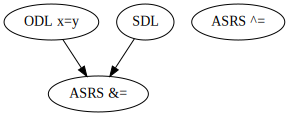

In [ ]:
msg = "A.8.2 lexp |= rexp"
print(msg)
print('============================================')
# 2) Specify a program
program = x|y
# 3) Specify a list of mutants and mutation names
SDL = x
mutations = [y,SDL,x&y,x^y]
mutationNames = {
    "y": "ODL x=y",
    "x": "SDL",
    "x & y": "ASRS &=",
    "x ^ y": "ASRS ^="
}
# 4) Keep non equivalent mutants
mutations = keepNonEquivalentMutants(program, mutations)
# 5) Keep non redundant mutants
mutations = keepNonRedundantMutants(mutations)
# 6) Identify subsumption relations
subsumptions = identifySubsumptions(program, mutations, conditions)
print('============================================')
# 7) Draw the subsumption relation graph
createSubsumptionRelationGraph(subsumptions, mutations, mutationNames)

A.8.3 lexp ^= rexp
x | y subsumes y
x | y subsumes x
y subsumes x & y
x subsumes x & y
x | y subsumes x & y


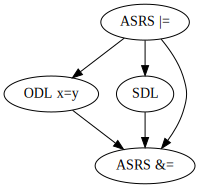

In [ ]:
msg = "A.8.3 lexp ^= rexp"
print(msg)
print('============================================')
# 2) Specify a program
program = x^y
# 3) Specify a list of mutants and mutation names
SDL = x
mutations = [y,SDL,x|y,x&y]
mutationNames = {
    "y": "ODL x=y",
    "x": "SDL",
    "x & y": "ASRS &=",
    "x | y": "ASRS |="
}
# 4) Keep non equivalent mutants
mutations = keepNonEquivalentMutants(program, mutations)
# 5) Keep non redundant mutants
mutations = keepNonRedundantMutants(mutations)
# 6) Identify subsumption relations
subsumptions = identifySubsumptions(program, mutations, conditions)
print('============================================')
# 7) Draw the subsumption relation graph
createSubsumptionRelationGraph(subsumptions, mutations, mutationNames)

# **Evaluating our Approach**

### **MuJava-M tool**

We created a tool called Hunor to automate various steps of the study. We also developed hunor-maven-plugin to facilitate the execution of MuJava, MuJava-M, and mutation analysis in maven projects. To replicate the study or run the tools on other subjects, we provide a Docker image that contains all the tools and settings needed to run Hunor a maven project. The image is available on Docker Hub at https://hub.docker.com/r/mutationsubsumption/hunor.

### **Our approach**

We generate mutants for joda-time v2.10.1, commons-math v3.6.1, commons-lang v3.6, h2 v1.4.199, and javassist v3.20. The results of our study are summarized in a CSV file. The following command downloads the CSV file from GitHub.

In [ ]:
!wget -nc https://raw.githubusercontent.com/easy-software-ufal/subsumption-relations/master/Reduction%20and%20Effectiveness.csv

--2020-11-11 14:36:50--  https://raw.githubusercontent.com/easy-software-ufal/subsumption-relations/master/Reduction%20and%20Effectiveness.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 695452 (679K) [text/plain]
Saving to: ‘Reduction and Effectiveness.csv’

Reduction and Effec 100%[===================>] 679.15K  --.-KB/s    in 0.1s    

2020-11-11 14:36:51 (6.51 MB/s) - ‘Reduction and Effectiveness.csv’ saved [695452/695452]



The field of the CSV file are the following.
```
id - a non-unique random identifier generated by the script.
target - mutation target (lexp + rexp, exp, -exp, etc.)
mutants_in_minimal - amount of mutants in the minimal set (generated by MuJava-M)
test_suites - amount of test suites generated by EvosuiteR (each mutant in the minimal set must have one)
assertions - amount of tests with "asserts" (each test suite must have one, since EvosuiterR stops when finds a test)
mutants - amount of mutants generated by MuJava
killed_mutants - amount of killed mutants (from the total in "mutants")
not_equivalent_mutants - amount of mutants that were not classified as equivalents by TCE
% - killed_mutants/mutants - effectiveness of MuJavaM.
differential_success - indicates whether EvosuiteR successfully generated the test suites
minimal - list of mutants in the minimal set
survive - list of survived mutants 
killed - list of killed mutants
equivalent - list of equivalent mutants classified by TCE
class - classe onde o alvo foi encontrado.
method - method where the target was found
line - line where the target was found (MuJava generates a new source code file, which we need to check since the line may not be the same
column - column of the mutation target
project - project of the mutation target
```


**Reading the CSV file**

In [ ]:
df = pandas.read_csv('Reduction and Effectiveness.csv',sep=',')
df.tail()
# we delete some columns
del df['test_suites']
del df['assertions']
#del df['class']
del df['method']
del df['line']
del df['column']
del df['differential_success']
del df['id']
print("We have "+str(len(df))+" rows")
df.loc[df['target']=='lexp ^ rexp', 'minimal'] = 'LOR |'
df.loc[df['target']=='exp++', 'minimal'] = 'LOI ~exp'
df.loc[df['target']=='exp--', 'minimal'] = 'LOI ~exp'

We have 4137 rows


**Defining some helper functions**

In [ ]:
def getElements(df, column):
  """
  This function returns the set of elements present in a certain column of a dataframe.
  """
  elements = []
  for s in df[column].values:
    s = str(s)
    current_list_of_elements = s.split(',')
    for element in current_list_of_elements:
      elements.append(element)
  elements = set(elements)
  elements.discard("nan") # we remove nan 
  return elements
  
def calculateNumberOfMutantsMuJava(df):
  counter = 0
  # go through each line of the file
  for i in df.index: 
      line = df[df.index==i]
      killed = getElements(line, "killed")
      survive = getElements(line, "survive")
      equivalent = getElements(line, "equivalent")
      allMutants = killed.union(survive).union(equivalent)
      counter = counter + len(allMutants)
  return counter

def calculateNumberOfMutantsMuJavaM(df):
  counter = 0
  # go through each line of the file
  for i in df.index: 
      line = df[df.index==i]
      minimal = getElements(line, "minimal")
      counter = counter + len(minimal)
  return counter

def calculateNumberOfMutantsIntersectionEquivalentSurvived(df):
  counter = 0
  # go through each line of the file
  for i in df.index: 
    line = df[df.index==i]
    survive = getElements(line, "survive")
    equivalent = getElements(line, "equivalent")
    if(len(survive.intersection(equivalent))>0):
      counter = counter + 1
    if(len(equivalent.intersection(survive))>0):
      counter = counter + 1
  return counter

Identifying the number of occurences and mutants for the targets that have the same minimal set in the ICST and our current evaluation. The preprint of the ICST paper can be found [here.](https://www.cin.ufpe.br/~damorim/publications/guimaraes-etal-icst2020.pdf)

In [ ]:
# Mutations that have the same minimal set of mutants in both approaches (ICST 2020 and our approach)
mutations = ['lexp == rexp', 'lexp != rexp', 'lexp > rexp', 'lexp >= rexp',
            'lexp < rexp', 'lexp <= rexp', 
            'lhs <<= rhs', 'lhs >>= rhs', 'lhs &= rhs', 'lhs |= rhs', 'lhs ^= rhs',
            'exp', '-exp', 'exp++', 'exp--','~exp','+exp','!exp',
            'lexp & rexp','lexp | rexp','lexp ^ rexp',
            'lexp && rexp','lexp || rexp']          
indexes = []       
result = pandas.DataFrame(columns=df.columns) 

for i in df.index: 
    line = df[df.index==i]    
    t = line['target'].values
    if(t[0] in mutations):
      if(t[0] == 'lexp == rexp'):
        minimal = getElements(line, 'minimal')
        if(minimal == {'ROR >=', 'ROR false', 'ROR <='}):
          result = result.append(line)
      elif(t[0] == 'lexp != rexp'): 
        minimal = getElements(line, 'minimal')
        if(minimal == {'ROR >', 'ROR true', 'ROR <'}):
          result = result.append(line)
      elif(t[0] == 'exp'): 
        minimal = getElements(line,'minimal')
        if(minimal == {'AOIU -exp'}):
          result = result.append(line)          
      else:
        result = result.append(line)

print("We have "+ str(len(result)) +" occurences of mutation targets")
print("We have "+ str(calculateNumberOfMutantsMuJava(result)) +" mutants generated by MuJava in our evaluation")
print("We have "+ str(calculateNumberOfMutantsMuJavaM(result)) +" mutants generated by MuJava-M in our evaluation")
print("We have "+ str(len(getElements(result, "target"))) +" different targets in our evaluation")
getElements(result, "target")

df = result

projects = df['project'].unique()
print('We evaluate the following large real open source projects: '+str(projects))

We have 1403 occurences of mutation targets
We have 6898 mutants generated by MuJava in our evaluation
We have 1850 mutants generated by MuJava-M in our evaluation
We have 18 different targets in our evaluation
We evaluate the following large real open source projects: ['h2' 'joda-time' 'commons-math' 'javassist' 'commons-lang']


Identifying the number of classes, and mutants generated by MuJava and MuJava-M in each project

In [ ]:
numberOfClasses = 0
numberOfMutantsMuJava = 0
numberOfMutantsMuJavaM = 0

for p in projects:
  rows = df[df['project']==str(p)]
  classes = len(rows["class"].unique())
  numberOfClasses = numberOfClasses + classes
  mujava = calculateNumberOfMutantsMuJava(rows)
  numberOfMutantsMuJava = numberOfMutantsMuJava + mujava
  mujavam = calculateNumberOfMutantsMuJavaM(rows)
  numberOfMutantsMuJavaM = numberOfMutantsMuJavaM + mujavam
  print("Project "+str(p)+": #classes: "+str(classes)+"; #mutants generated by MuJava: "+
        str(mujava)+"; #mutants generated by MuJavaM: "+str(mujavam))
  
print("We evaluate in total:" + 
      "\n#classes: " + str(numberOfClasses) +
      "\n#mutants generated by MuJava: " + str(numberOfMutantsMuJava) + 
      "\n#mutants generated by MuJavaM: " + str(numberOfMutantsMuJavaM))

Project h2: #classes: 11; #mutants generated by MuJava: 231; #mutants generated by MuJavaM: 63
Project joda-time: #classes: 38; #mutants generated by MuJava: 2755; #mutants generated by MuJavaM: 666
Project commons-math: #classes: 34; #mutants generated by MuJava: 1282; #mutants generated by MuJavaM: 368
Project javassist: #classes: 20; #mutants generated by MuJava: 893; #mutants generated by MuJavaM: 216
Project commons-lang: #classes: 22; #mutants generated by MuJava: 1737; #mutants generated by MuJavaM: 537
We evaluate in total:
#classes: 125
#mutants generated by MuJava: 6898
#mutants generated by MuJavaM: 1850


Identifying the number of occurrences for each target

In [ ]:
targets = getElements(df,"target")
def listTargetsOccurrences(df):
  for t in targets:
    dfTargets = df[df['target']==t]
    projects = dfTargets['project'].unique()
    if len(dfTargets) > 0:
      print("Target: "+t+" Occurrences: "+str(len(dfTargets))+" Projects: "+str(len(projects)))
      
listTargetsOccurrences(df)

Target: lexp > rexp Occurrences: 19 Projects: 4
Target: lexp == rexp Occurrences: 34 Projects: 2
Target: lexp & rexp Occurrences: 33 Projects: 2
Target: lexp | rexp Occurrences: 6 Projects: 1
Target: lexp || rexp Occurrences: 25 Projects: 4
Target: lexp < rexp Occurrences: 35 Projects: 4
Target: ~exp Occurrences: 13 Projects: 2
Target: -exp Occurrences: 38 Projects: 4
Target: exp++ Occurrences: 4 Projects: 3
Target: exp-- Occurrences: 4 Projects: 2
Target: lexp != rexp Occurrences: 14 Projects: 4
Target: lexp <= rexp Occurrences: 16 Projects: 3
Target: lexp ^ rexp Occurrences: 6 Projects: 1
Target: exp Occurrences: 1089 Projects: 5
Target: lhs ^= rhs Occurrences: 1 Projects: 1
Target: !exp Occurrences: 27 Projects: 4
Target: lexp && rexp Occurrences: 13 Projects: 2
Target: lexp >= rexp Occurrences: 26 Projects: 4


Identifying the reduction and effectiveness of our approach for each target

In [ ]:
def getReductionAndEffectivenessOurApproach(df):
  mapOurApproachMinimal = {}
  mapBaselineMinimal = {}
  mapAllMutants = {}
  for i in df.index: 
      line = df[df.index==i]
      target = str(line['target'].values)
      killed = getElements(line, "killed")
      survive = getElements(line, "survive")
      equivalent = getElements(line, "equivalent")
      ourMinimal = getElements(line, "minimal")
      baselineMinimal = ourMinimal.union(survive)-equivalent
      allMutants = killed.union(survive)-equivalent
      mapOurApproachMinimal[target] = mapOurApproachMinimal.get(target, 0) + len(ourMinimal)
      mapBaselineMinimal[target] = mapBaselineMinimal.get(target, 0) + len(baselineMinimal)
      mapAllMutants[target] = mapAllMutants.get(target, 0) + len(allMutants)
  print(mapOurApproachMinimal)
  print(mapBaselineMinimal)
  print(mapAllMutants)  
  keys = mapOurApproachMinimal.keys()
  effectiveness = 0
  reduction = 0
  for k in keys:
    effectiveness = mapOurApproachMinimal.get(k, 0)/mapBaselineMinimal.get(k, 0)
    reduction = mapOurApproachMinimal.get(k, 0)/mapAllMutants.get(k, 0)
    print("Target: "+str(k)+" Reduction: "+str(1-reduction)+" Effectiveness: "+str(effectiveness))

getReductionAndEffectivenessOurApproach(df)

{"['exp']": 1089, "['lexp > rexp']": 57, "['lexp || rexp']": 100, "['lexp >= rexp']": 78, "['!exp']": 27, "['lexp != rexp']": 42, "['-exp']": 38, "['lexp == rexp']": 102, "['lexp < rexp']": 105, "['lexp && rexp']": 52, "['lexp <= rexp']": 48, "['exp++']": 4, "['lexp ^ rexp']": 6, "['~exp']": 13, "['exp--']": 4, "['lexp & rexp']": 66, "['lexp | rexp']": 18, "['lhs ^= rhs']": 1}
{"['exp']": 2307, "['lexp > rexp']": 57, "['lexp || rexp']": 100, "['lexp >= rexp']": 78, "['!exp']": 27, "['lexp != rexp']": 42, "['-exp']": 41, "['lexp == rexp']": 102, "['lexp < rexp']": 105, "['lexp && rexp']": 52, "['lexp <= rexp']": 48, "['exp++']": 4, "['lexp ^ rexp']": 6, "['~exp']": 13, "['exp--']": 6, "['lexp & rexp']": 66, "['lexp | rexp']": 18, "['lhs ^= rhs']": 2}
{"['exp']": 4501, "['lexp > rexp']": 152, "['lexp || rexp']": 225, "['lexp >= rexp']": 208, "['!exp']": 54, "['lexp != rexp']": 112, "['-exp']": 92, "['lexp == rexp']": 272, "['lexp < rexp']": 280, "['lexp && rexp']": 117, "['lexp <= rexp']

### **Comparison with random sampling**

Defining some functions to calculate the effectiveness of the random sampling approach

In [ ]:
# Defining some constants
MEAN = 0
MEDIAN = 1

def generateRandomList(quantity, interval):
  randomList = []
  counter = 0
  while counter < quantity:
    value = rd.randint(1, interval)
    if(value in randomList):
      continue
    else:
      randomList.append(value)
      counter = counter + 1
  return randomList

def calculateSuccessOfRandom(baseline, random):
  counter = 0
  for elem in random:
    if(elem in baseline):
      counter = counter + 1
  return counter

def calculateEffectivenessOfRandom(quantityMutantsBaseline, quantityMutantsTotal, percentualRandom, iterations, measureType):  
  # create a list with the baseline mutants
  baseline = generateRandomList(quantityMutantsBaseline, quantityMutantsTotal)
  quantityRandomElements = math.ceil(percentualRandom * quantityMutantsTotal) 
  successOfRandom = list()

  for x in range(iterations):
    randomList = generateRandomList(quantityRandomElements, quantityMutantsTotal)
    currentSuccessOfRandom = calculateSuccessOfRandom(baseline, randomList)
    successOfRandom.append(currentSuccessOfRandom)

  if measureType == MEAN:
    return sum(successOfRandom)/(quantityMutantsBaseline * iterations)
  if measureType == MEDIAN:
    successOfRandom.sort()
    return successOfRandom[int(iterations/2)]/quantityMutantsBaseline

def calculateEffectivenessOfRandomAll(df, percentualRandom, measureType, iterations):
  counter = 0
  successOfRandom = list()

  # go through each line of the file
  for i in df.index: 
      line = df[df.index==i]
      killed = getElements(line, "killed")
      survive = getElements(line, "survive")
      equivalent = getElements(line, "equivalent")
      minimal = getElements(line, "minimal")
      baseline = minimal.union(survive)-equivalent
      allMutants = killed.union(survive)-equivalent
      currentSuccessOfRandom = calculateEffectivenessOfRandom(len(baseline), len(allMutants), percentualRandom, iterations, measureType)
      successOfRandom.append(currentSuccessOfRandom)
      counter = counter + 1

  if measureType == MEAN:
    return sum(successOfRandom)/counter
  if measureType == MEDIAN:
    successOfRandom.sort()
    return successOfRandom[int(counter/2)]

Defining some functions to caculate the effectiveness of our approach

In [ ]:
def calculateSamplingRateSubsumptionRelations(df):
  total = 0
  minimalCount = 0
  # go through each line of the file
  for i in df.index: 
      line = df[df.index==i]
      killed = getElements(line, "killed")
      survive = getElements(line, "survive")
      equivalent = getElements(line, "equivalent")
      minimal = getElements(line, "minimal")
      allMutants = killed.union(survive)-equivalent
      minimalCount = minimalCount + len(minimal)
      total = total + len(allMutants)
  return minimalCount/total

def calculateEffectivenessOfOurApproachAll(df):
  counter = 0
  successOfOurApproach = 0

  # go through each line of the file
  for i in df.index: 
      line = df[df.index==i]
      killed = getElements(line, "killed")
      survive = getElements(line, "survive")
      equivalent = getElements(line, "equivalent")
      minimal = getElements(line, "minimal")
      baseline = minimal.union(survive)-equivalent
      allMutants = killed.union(survive)-equivalent
      currentSuccessOfOurApproach = len(minimal)/len(baseline)
      successOfOurApproach = successOfOurApproach + currentSuccessOfOurApproach
      counter = counter + 1

  return successOfOurApproach/counter

Calculating the effectiveness of both approaches

In [ ]:
#measureType = MEAN # mean of success in the X iterations in each line
measureType = MEDIAN # median of success in the X iterations in each line
sample = 10 # number of considered sampling rates
iterationsInEachLine = 100 # number of runnings in each line
values = []
x = []

for i in range(sample):
  xval = i/sample
  x.append(xval)
  effectiveness = calculateEffectivenessOfRandomAll(df, xval, measureType, iterationsInEachLine)
  values.append(effectiveness)

ourApproachEff = calculateEffectivenessOfOurApproachAll(df)
ourApproachSamp = calculateSamplingRateSubsumptionRelations(df)
print("Our approach has a sampling rate of "+str(ourApproachSamp)+
      " and an effectiveness of "+str(ourApproachEff))

Our approach has a sampling rate of 0.28624477796688846 and an effectiveness of 0.759265858873844


Creating a figure to compare our approach to the random sampling approach

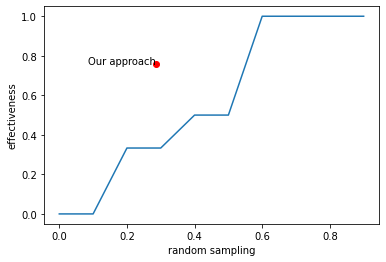

In [ ]:
plt.plot(x, values)
plt.xlabel('random sampling')
plt.ylabel('effectiveness')
plt.plot(ourApproachSamp,ourApproachEff,'ro') 
plt.text(ourApproachSamp,ourApproachEff,'Our approach',horizontalalignment='right')
plt.show()